In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import time
%matplotlib inline

os.chdir('..\..\..\..')

from input_configuration import base_year

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Thu, 07 Dec 2023 11:55


In [3]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.1%}".format
index_map = {0:'Other', 1:'City of SeaTac'}

# Workers by County

In [4]:
df_wfh = pd.read_csv(os.path.join(working_dir,'wfh_county.csv'))
df_wfh_survey = pd.read_csv(os.path.join(working_dir,'survey','wfh_county.csv'))

# Total Workers by County
df_tot = pd.read_csv(os.path.join(working_dir,'pptyp_county.csv'))
df_tot = df_tot[df_tot['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_tot = df_tot.groupby('person_county').sum()[['psexpfac']].reset_index()
total_nonwfh_workers = df_tot.sum()['psexpfac']

df_tot_survey = pd.read_csv(os.path.join(working_dir,'survey','pptyp_county.csv'))
df_tot_survey = df_tot_survey[df_tot_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_tot_survey = df_tot_survey.groupby('person_county').sum()[['psexpfac']].reset_index()
total_nonwfh_workers_survey = df_tot_survey.sum()['psexpfac']

df = df_wfh.merge(df_tot, on='person_county')
df.index = df['person_county']
df.drop('person_county', axis=1,inplace=True)
df.columns = ['WFH Workers', 'Total Workers']
df.loc['Region'] = df.sum(axis=0)
df['% WFH Workers'] = (df['WFH Workers']/df['Total Workers']).apply(format_percent)
df

,WFH Workers,Total Workers,% WFH Workers
person_county,,,
King,"57,836","1,061,884",5.4%
Kitsap,"11,111","108,598",10.2%
Pierce,"27,250","367,265",7.4%
Snohomish,"26,903","368,992",7.3%
Region,"123,100","1,906,739",6.5%


# Tour Rate for Work-at-Home Workers

In [5]:
df_tours = pd.read_csv(os.path.join(working_dir,'work_from_home_tours.csv'))
total_wfh_workers = df_wfh.psexpfac.sum()
df = df_tours.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df['tour_rate'] = df['toexpfac']/total_wfh_workers
df

df_tours_survey = pd.read_csv(os.path.join(working_dir,'survey','work_from_home_tours.csv'))
total_wfh_workers_survey = df_wfh.psexpfac.sum()
df_survey = df_tours_survey.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/total_wfh_workers_survey
df = df.merge(df_survey,on='pdpurp',suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model': 'tours_model', 'toexpfac_survey': 'tours_survey'}, inplace=True)
df['tours_survey'] = df['tours_survey'].astype('int')
df[['pdpurp','tours_model','tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,tours_model,tour_rate_model,tours_survey,tour_rate_survey
0,Escort,"44,862",0.36,23855,0.19
1,Meal,"6,004",0.05,13883,0.11
2,Personal Business,"30,538",0.25,37346,0.30
3,School,"2,806",0.02,687,0.01
4,Shop,"38,151",0.31,51688,0.42
5,Social,"37,699",0.31,76994,0.63
6,Work,"13,455",0.11,25335,0.21


## City of SeaTac

In [6]:
df_tours = pd.read_csv(os.path.join(working_dir,'work_from_home_tours.csv'))
df_tours = df_tours.loc[df_tours.person_subarea==1]
total_wfh_workers = df_wfh.psexpfac.sum()
df = df_tours.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df['tour_rate'] = df['toexpfac']/total_wfh_workers
df

df_tours_survey = pd.read_csv(os.path.join(working_dir,'survey','work_from_home_tours.csv'))
df_tours_survey = df_tours_survey.loc[df_tours_survey.person_subarea==1]
total_wfh_workers_survey = df_wfh.psexpfac.sum()
df_survey = df_tours_survey.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/total_wfh_workers_survey
df = df.merge(df_survey,on='pdpurp',suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model': 'tours_model', 'toexpfac_survey': 'tours_survey'}, inplace=True)
df['tours_survey'] = df['tours_survey'].astype('int')
df[['pdpurp','tours_model','tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,tours_model,tour_rate_model,tours_survey,tour_rate_survey
0,Shop,736,0.01,2002,0.02


## Other

In [7]:
df_tours = pd.read_csv(os.path.join(working_dir,'work_from_home_tours.csv'))
df_tours = df_tours.loc[df_tours.person_subarea!=1]
total_wfh_workers = df_wfh.psexpfac.sum()
df = df_tours.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df['tour_rate'] = df['toexpfac']/total_wfh_workers
df

df_tours_survey = pd.read_csv(os.path.join(working_dir,'survey','work_from_home_tours.csv'))
df_tours_survey = df_tours_survey.loc[df_tours_survey.person_subarea!=1]
total_wfh_workers_survey = df_wfh.psexpfac.sum()
df_survey = df_tours_survey.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/total_wfh_workers_survey
df = df.merge(df_survey,on='pdpurp',suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model': 'tours_model', 'toexpfac_survey': 'tours_survey'}, inplace=True)
df['tours_survey'] = df['tours_survey'].astype('int').apply('{:0,.0f}'.format)
df[['pdpurp','tours_model','tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,tours_model,tour_rate_model,tours_survey,tour_rate_survey
0,Escort,"44,066",0.36,"23,855",0.19
1,Meal,"5,897",0.05,"13,883",0.11
2,Personal Business,"30,013",0.24,"37,346",0.30
3,School,"2,755",0.02,687,0.01
4,Shop,"37,415",0.30,"49,686",0.40
5,Social,"37,010",0.30,"76,994",0.63
6,Work,"13,218",0.11,"25,335",0.21


### Tour Rates for Workers that do NOT WF

In [8]:
# Tour Rates by purpose by worker type
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv')).drop(columns='person_subarea')
df = df[df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot.sum()[['psexpfac']].values[0]

df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv')).drop(columns='person_subarea')
df_survey = df_survey[df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
# df[['pdpurp','total_tours_model','total_tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"209,611",0.11,"174,143",0.09
1,Meal,"336,771",0.18,"239,952",0.13
2,Personal Business,"175,717",0.09,"269,849",0.14
3,School,"26,005",0.01,"15,975",0.01
4,Shop,"235,879",0.12,"249,110",0.13
5,Social,"482,740",0.25,"454,542",0.24
6,Work,"1,639,439",0.86,"1,903,086",1.01


## City of SeaTac

In [9]:
# Tour Rates by purpose by worker type
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv'))
df = df.loc[df.person_subarea==1].drop(columns='person_subarea')
df = df[df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot.sum()[['psexpfac']].values[0]

df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv'))
df_survey = df_survey.loc[df_survey.person_subarea==1].drop(columns='person_subarea')
df_survey = df_survey[df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
# df[['pdpurp','total_tours_model','total_tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"4,620",0.00,"2,601",0.00
1,Meal,"7,620",0.00,587,0.00
2,Personal Business,"3,789",0.00,"9,472",0.01
3,Shop,"5,120",0.00,"3,228",0.00
4,Social,"9,883",0.01,603,0.00
5,Work,"35,577",0.02,"24,944",0.01


## Other

In [10]:
# Tour Rates by purpose by worker type
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv'))
df = df.loc[df.person_subarea!=1].drop(columns='person_subarea')
df = df[df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot.sum()[['psexpfac']].values[0]

df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv'))
df_survey = df_survey.loc[df_survey.person_subarea!=1].drop(columns='person_subarea')
df_survey = df_survey[df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
# df[['pdpurp','total_tours_model','total_tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"204,991",0.11,"171,542",0.09
1,Meal,"329,151",0.17,"239,365",0.13
2,Personal Business,"171,928",0.09,"260,376",0.14
3,School,"25,395",0.01,"15,975",0.01
4,Shop,"230,759",0.12,"245,882",0.13
5,Social,"472,857",0.25,"453,939",0.24
6,Work,"1,603,862",0.84,"1,878,142",0.99


### Tour Rates for Non-Workers

In [11]:
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv')).drop(columns='person_subarea')
df = df[-df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]


df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv')).drop(columns='person_subarea')
df_survey = df_survey[-df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"467,633",0.25,"430,404",0.23
1,Meal,"118,785",0.06,"166,557",0.09
2,Personal Business,"547,194",0.29,"605,620",0.32
3,School,"670,902",0.35,"702,028",0.37
4,Shop,"516,511",0.27,"492,265",0.26
5,Social,"756,571",0.40,"742,332",0.39
6,Work,"53,401",0.03,"131,467",0.07


## City of SeaTac

In [12]:
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv'))
df = df.loc[df.person_subarea==1].drop(columns='person_subarea')
df = df[-df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]


df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv'))
df_survey = df_survey.loc[df_survey.person_subarea==1].drop(columns='person_subarea')
df_survey = df_survey[-df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Meal,"2,633",0.00,114,0.00
1,School,"14,421",0.01,"5,338",0.00
2,Shop,"10,760",0.01,"4,905",0.00
3,Social,"15,926",0.01,"13,086",0.01


## Other

In [13]:
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv'))
df = df.loc[df.person_subarea!=1].drop(columns='person_subarea')
df = df[-df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]


df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv'))
df_survey = df_survey.loc[df_survey.person_subarea!=1].drop(columns='person_subarea')
df_survey = df_survey[-df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"456,786",0.24,"430,404",0.23
1,Meal,"116,152",0.06,"166,443",0.09
2,Personal Business,"535,861",0.28,"605,620",0.32
3,School,"656,481",0.35,"696,691",0.37
4,Shop,"505,751",0.27,"487,359",0.26
5,Social,"740,645",0.39,"729,247",0.39
6,Work,"52,331",0.03,"131,467",0.07


# Commute Tour Distance
All Workers

In [14]:
df = pd.read_csv(os.path.join(working_dir,'tour_distance.csv'))
df = df[df['pdpurp'] == 'Work']

pd.options.display.float_format = '{:0,.4f}'.format
_df = df.groupby('tautodist_bin').sum()[['toexpfac']].reset_index()
_df_county = df.groupby(['person_subarea', 'tautodist_bin']).sum()[['toexpfac']].reset_index()

_df['percent'] = _df['toexpfac']/_df['toexpfac'].sum()
_df['cumulative_percent'] = _df['percent'].cumsum()


_df_county['percent_county'] = _df_county.groupby('person_subarea')['toexpfac'].apply(lambda x: x/x.sum())
_df_county['cumulative_percent_county'] = _df_county.groupby('person_subarea')['percent_county'].cumsum()


# remove records that are outside 99% of records
_df = _df.loc[_df['cumulative_percent'] <= 0.99]
_df_county = _df_county.loc[_df_county['cumulative_percent_county'] <= 0.99]

In [15]:
df_survey = pd.read_csv(os.path.join(working_dir,'survey','tour_distance.csv'))
df_survey = df_survey[df_survey['pdpurp'] == 'Work']

_df_survey = df_survey.groupby('tautodist_bin').sum()[['toexpfac']].reset_index()
_df_survey_county = df_survey.groupby(['person_subarea', 'tautodist_bin']).sum()[['toexpfac']].reset_index()

_df_survey['percent'] = _df_survey['toexpfac']/_df_survey['toexpfac'].sum()
_df_survey['cumulative_percent'] = _df_survey['percent'].cumsum()

_df_survey_county['percent_county'] = _df_survey_county.groupby('person_subarea')['toexpfac'].apply(lambda x: x/x.sum())
_df_survey_county['cumulative_percent_county'] = _df_survey_county.groupby('person_subarea')['percent_county'].cumsum()

# remove records that are outside 99% of records
_df_survey = _df_survey[_df_survey['cumulative_percent'] <= 0.99]
_df_survey_county = _df_survey_county.loc[_df_survey_county['cumulative_percent_county'] <= 0.99]

Weighted Average Distance

In [16]:
if len(_df_survey) > 0:
    _df_merged = _df.merge(_df_survey, on='tautodist_bin', suffixes=['_model','_survey'])
    print('model: '+ str((_df_merged['toexpfac_model']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_model'].sum()))
    print('survey: '+ str((_df_merged['toexpfac_survey']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_survey'].sum()))
else:
    print(str((_df['toexpfac']*_df['tautodist_bin']).sum()*1.0/_df['toexpfac'].sum()))


model: 10.930483083555664
survey: 10.622522148132719


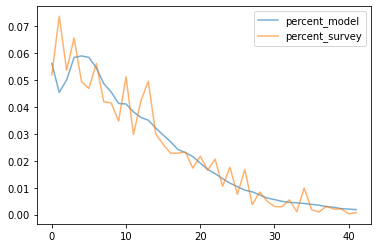

In [17]:
if len(_df_survey) > 0:
    _df_merged[['percent_model','percent_survey']].plot(alpha=0.6)
else:
    _df[['percent']].plot(alpha=0.6)

## City of SeaTac

In [18]:
_df_survey_pierce = _df_survey_county.loc[_df_survey_county.person_subarea==1]
_df_pierce = _df_county.loc[_df_county.person_subarea==1]

if len(_df_survey_pierce) > 0:
    _df_merged = _df_pierce.merge(_df_survey_pierce, on=['person_subarea', 'tautodist_bin'], suffixes=['_model','_survey'])
    print('model: '+ str((_df_merged['toexpfac_model']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_model'].sum()))
    print('survey: '+ str((_df_merged['toexpfac_survey']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_survey'].sum()))
else:
    print(str((_df['toexpfac']*_df['tautodist_bin']).sum()*1.0/_df['toexpfac'].sum()))


model: 7.62113028586484


survey: 7.862758914176397


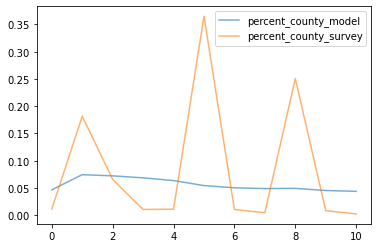

In [19]:
if len(_df_survey_pierce) > 0:
    _df_merged[['percent_county_model','percent_county_survey']].plot(alpha=0.6)
else:
    _df_pierce[['percent_county']].plot(alpha=0.6)

## Other

In [20]:
_df_survey_pierce = _df_survey_county.loc[_df_survey_county.person_subarea!=1]
_df_pierce = _df_county.loc[_df_county.person_subarea!=1]

if len(_df_survey_pierce) > 0:
    _df_merged = _df_pierce.merge(_df_survey_pierce, on=['person_subarea', 'tautodist_bin'], suffixes=['_model','_survey'])
    print('model: '+ str((_df_merged['toexpfac_model']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_model'].sum()))
    print('survey: '+ str((_df_merged['toexpfac_survey']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_survey'].sum()))
else:
    print(str((_df['toexpfac']*_df['tautodist_bin']).sum()*1.0/_df['toexpfac'].sum()))


model: 10.96031922495174
survey: 10.64936224409743


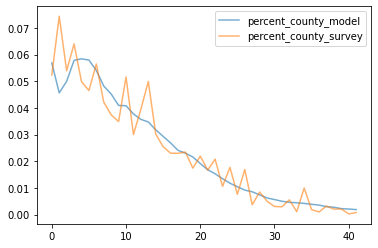

In [21]:
if len(_df_survey) > 0:
    _df_merged[['percent_county_model','percent_county_survey']].plot(alpha=0.6)
else:
    _df[['percent']].plot(alpha=0.6)

In [22]:
# Work trip distance to not usual workplace for non-WFH workers


# Average Trip Distance
Workers that work DO NOT work from home

In [23]:
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df[df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]
# df.groupby(['travdist_bin','']).sum()[['trexpfac']]
df_usual = df[df['dadtyp'] == 'Usual Workplace']
dist = (df_usual['trexpfac']*1.0*df_usual['travdist_bin']).sum()/df_usual['trexpfac'].sum()
print('Avg. distance to Usual Workplace: ' + str(dist))
df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------------')
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_wfh = pd.DataFrame.from_dict(result, orient='index').reset_index()
_df_non_wfh.columns = ['Purpose','Workers at Non-Home Location']
_df_non_wfh

Avg. distance to Usual Workplace: 9.127686757001165
Avg. distance to Other Workplace: 4.783572671323586
----------------------------------------


,Purpose,Workers at Non-Home Location
0,None/Home,5.7197
1,Work,8.2977
2,School,2.9052
3,Escort,5.2971
4,Personal Business,4.5676
5,Shop,3.8048
6,Meal,4.2935
7,Social,4.0382
8,Change Mode Inserted Purpose,8.5493


In [24]:
# WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------')
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()

_df_wfh = pd.DataFrame.from_dict(result, orient='index')
_df_wfh = _df_wfh.reset_index()
_df_wfh.columns = ['Purpose','WFH Workers']
_df_wfh

Avg. distance to Other Workplace: 13.299097381846723
----------------------------------


,Purpose,WFH Workers
0,None/Home,3.3232
1,Work,13.2818
2,School,4.7384
3,Escort,2.8104
4,Personal Business,2.2899
5,Shop,2.4303
6,Meal,3.0064
7,Social,2.3070
8,Change Mode Inserted Purpose,12.5365


In [25]:
# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df[-df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_worker = pd.DataFrame.from_dict(result, orient='index')
_df_non_worker = _df_non_worker.reset_index()
_df_non_worker.columns = ['Purpose','Non-Workers']
_df_non_worker

,Purpose,Non-Workers
0,None/Home,5.7197
1,Work,8.2977
2,School,2.9052
3,Escort,5.2971
4,Personal Business,4.5676
5,Shop,3.8048
6,Meal,4.2935
7,Social,4.0382
8,Change Mode Inserted Purpose,8.5493


In [26]:
_df = pd.merge(_df_non_wfh, _df_wfh).merge(_df_non_worker)

In [27]:
_df

,Purpose,Workers at Non-Home Location,WFH Workers,Non-Workers
0,None/Home,5.7197,3.3232,5.7197
1,Work,8.2977,13.2818,8.2977
2,School,2.9052,4.7384,2.9052
3,Escort,5.2971,2.8104,5.2971
4,Personal Business,4.5676,2.2899,4.5676
5,Shop,3.8048,2.4303,3.8048
6,Meal,4.2935,3.0064,4.2935
7,Social,4.0382,2.3070,4.0382
8,Change Mode Inserted Purpose,8.5493,12.5365,8.5493


## City of SeaTac

In [28]:
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_subarea==1].drop(columns='person_subarea')
df = df[df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]
# df.groupby(['travdist_bin','']).sum()[['trexpfac']]
df_usual = df[df['dadtyp'] == 'Usual Workplace']
dist = (df_usual['trexpfac']*1.0*df_usual['travdist_bin']).sum()/df_usual['trexpfac'].sum()
print('Avg. distance to Usual Workplace: ' + str(dist))
df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------------')
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_subarea==1].drop(columns='person_subarea')
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_wfh = pd.DataFrame.from_dict(result, orient='index').reset_index()
_df_non_wfh.columns = ['Purpose','Workers at Non-Home Location']
_df_non_wfh

Avg. distance to Usual Workplace: 7.632867544831162
Avg. distance to Other Workplace: 4.297520661157025
----------------------------------------


,Purpose,Workers at Non-Home Location
0,None/Home,5.5227
1,Work,7.0135
2,School,3.1396
3,Escort,4.9407
4,Personal Business,4.5470
5,Shop,3.7602
6,Meal,4.6077
7,Social,4.3790
8,Change Mode Inserted Purpose,7.0453


In [29]:
# WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df = df.loc[df.person_subarea==1].drop(columns='person_subarea')
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------')
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df = df.loc[df.person_subarea==1].drop(columns='person_subarea')
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()

_df_wfh = pd.DataFrame.from_dict(result, orient='index')
_df_wfh = _df_wfh.reset_index()
_df_wfh.columns = ['Purpose','WFH Workers']
_df_wfh

Avg. distance to Other Workplace: 10.837288135593221
----------------------------------


,Purpose,WFH Workers
0,None/Home,3.2108
1,Work,10.8373
2,School,5.6094
3,Escort,2.6095
4,Personal Business,2.4002
5,Shop,2.4163
6,Meal,3.6324
7,Social,2.4907
8,Change Mode Inserted Purpose,15.2500


In [30]:
# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_subarea==1].drop(columns='person_subarea')
df = df[-df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_subarea==1].drop(columns='person_subarea')
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_worker = pd.DataFrame.from_dict(result, orient='index')
_df_non_worker = _df_non_worker.reset_index()
_df_non_worker.columns = ['Purpose','Non-Workers']
_df_non_worker

,Purpose,Non-Workers
0,None/Home,5.5227
1,Work,7.0135
2,School,3.1396
3,Escort,4.9407
4,Personal Business,4.5470
5,Shop,3.7602
6,Meal,4.6077
7,Social,4.3790
8,Change Mode Inserted Purpose,7.0453


In [31]:
_df = pd.merge(_df_non_wfh, _df_wfh).merge(_df_non_worker)
_df

,Purpose,Workers at Non-Home Location,WFH Workers,Non-Workers
0,None/Home,5.5227,3.2108,5.5227
1,Work,7.0135,10.8373,7.0135
2,School,3.1396,5.6094,3.1396
3,Escort,4.9407,2.6095,4.9407
4,Personal Business,4.5470,2.4002,4.5470
5,Shop,3.7602,2.4163,3.7602
6,Meal,4.6077,3.6324,4.6077
7,Social,4.3790,2.4907,4.3790
8,Change Mode Inserted Purpose,7.0453,15.2500,7.0453


## Other

In [32]:
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_subarea!=1].drop(columns='person_subarea')
df = df[df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]
# df.groupby(['travdist_bin','']).sum()[['trexpfac']]
df_usual = df[df['dadtyp'] == 'Usual Workplace']
dist = (df_usual['trexpfac']*1.0*df_usual['travdist_bin']).sum()/df_usual['trexpfac'].sum()
print('Avg. distance to Usual Workplace: ' + str(dist))
df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------------')
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_subarea!=1].drop(columns='person_subarea')
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_wfh = pd.DataFrame.from_dict(result, orient='index').reset_index()
_df_non_wfh.columns = ['Purpose','Workers at Non-Home Location']
_df_non_wfh

Avg. distance to Usual Workplace: 9.161123758610856
Avg. distance to Other Workplace: 4.794663465241608
----------------------------------------


,Purpose,Workers at Non-Home Location
0,None/Home,5.7240
1,Work,8.3264
2,School,2.9001
3,Escort,5.3056
4,Personal Business,4.5680
5,Shop,3.8058
6,Meal,4.2863
7,Social,4.0309
8,Change Mode Inserted Purpose,8.5783


Only workers that work **from home**

In [33]:
# WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df = df.loc[df.person_subarea!=1].drop(columns='person_subarea')
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------')
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df = df.loc[df.person_subarea!=1].drop(columns='person_subarea')
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()

_df_wfh = pd.DataFrame.from_dict(result, orient='index')
_df_wfh = _df_wfh.reset_index()
_df_wfh.columns = ['Purpose','WFH Workers']
_df_wfh

Avg. distance to Other Workplace: 13.340497092691825
----------------------------------


,Purpose,WFH Workers
0,None/Home,3.3253
1,Work,13.3229
2,School,4.7213
3,Escort,2.8140
4,Personal Business,2.2879
5,Shop,2.4306
6,Meal,2.9946
7,Social,2.3036
8,Change Mode Inserted Purpose,12.5155


In [34]:
# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_subarea!=1].drop(columns='person_subarea')
df = df[-df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_subarea!=1].drop(columns='person_subarea')
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_worker = pd.DataFrame.from_dict(result, orient='index')
_df_non_worker = _df_non_worker.reset_index()
_df_non_worker.columns = ['Purpose','Non-Workers']
_df_non_worker

,Purpose,Non-Workers
0,None/Home,5.7240
1,Work,8.3264
2,School,2.9001
3,Escort,5.3056
4,Personal Business,4.5680
5,Shop,3.8058
6,Meal,4.2863
7,Social,4.0309
8,Change Mode Inserted Purpose,8.5783


In [35]:
_df = pd.merge(_df_non_wfh, _df_wfh).merge(_df_non_worker)
_df

,Purpose,Workers at Non-Home Location,WFH Workers,Non-Workers
0,None/Home,5.7240,3.3253,5.7240
1,Work,8.3264,13.3229,8.3264
2,School,2.9001,4.7213,2.9001
3,Escort,5.3056,2.8140,5.3056
4,Personal Business,4.5680,2.2879,4.5680
5,Shop,3.8058,2.4306,3.8058
6,Meal,4.2863,2.9946,4.2863
7,Social,4.0309,2.3036,4.0309
8,Change Mode Inserted Purpose,8.5783,12.5155,8.5783


Average Trip Distance by Purpose and Worker/Person Type

# VMT

Workers that Work from Home

In [36]:
df = pd.read_csv(os.path.join(working_dir,'vmt_wfh.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_wfh.csv'))

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_wfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_wfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Change Mode Inserted Purpose,596,0.00,22087,0.18
Escort,134476,1.09,102084,0.83
Meal,30949,0.25,18337,0.15
None/Home,401097,3.26,275291,2.24
Personal Business,124090,1.01,32471,0.26
School,4235,0.03,442,0.00
Shop,150089,1.22,217770,1.77
Social,88780,0.72,125873,1.02
Work,37296,0.30,28235,0.23


In [37]:
df = pd.read_csv(os.path.join(working_dir,'vmt_nonwfh.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_nonwfh.csv'))

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_nonwfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_nonwfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Change Mode Inserted Purpose,281698,0.15,140005,0.07
Escort,2739291,1.44,2680996,1.42
Meal,1750519,0.92,1532333,0.81
None/Home,17178470,9.01,13921007,7.35
Personal Business,2044970,1.07,2260473,1.19
School,199198,0.10,55732,0.03
Shop,2368148,1.24,3274347,1.73
Social,2507147,1.31,2734787,1.44
Work,17509513,9.18,16329306,8.63


## City of SeaTac

In [38]:
df = pd.read_csv(os.path.join(working_dir,'vmt_wfh.csv'))
df = df.loc[df.person_subarea==1].drop(columns='person_subarea')
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_wfh.csv'))
df_survey = df_survey.loc[df_survey.person_subarea==1].drop(columns='person_subarea')

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_wfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_wfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
None/Home,7048,0.06,2814,0.02
Shop,2910,0.02,2814,0.02
Total,9958,0.08,5628,0.05


In [39]:
df = pd.read_csv(os.path.join(working_dir,'vmt_nonwfh.csv'))
df = df.loc[df.person_subarea==1].drop(columns='person_subarea')
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_nonwfh.csv'))
df_survey = df_survey.loc[df_survey.person_subarea==1].drop(columns='person_subarea')

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_nonwfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_nonwfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Escort,56440,0.03,63913,0.03
Meal,39610,0.02,4397,0.00
None/Home,315478,0.17,168856,0.09
Personal Business,41741,0.02,30980,0.02
Shop,47909,0.03,5789,0.00
Social,54152,0.03,15924,0.01
Work,302313,0.16,121126,0.06
Total,857647,0.45,410987,0.22


## Other

In [40]:
df = pd.read_csv(os.path.join(working_dir,'vmt_wfh.csv'))
df = df.loc[df.person_subarea!=1].drop(columns='person_subarea')
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_wfh.csv'))
df_survey = df_survey.loc[df_survey.person_subarea!=1].drop(columns='person_subarea')

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_wfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_wfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Change Mode Inserted Purpose,592,0.00,22087,0.18
Escort,132267,1.07,102084,0.83
Meal,30337,0.25,18337,0.15
None/Home,394048,3.20,272477,2.21
Personal Business,121721,0.99,32471,0.26
School,4138,0.03,442,0.00
Shop,147179,1.20,214956,1.75
Social,87100,0.71,125873,1.02
Work,36878,0.30,28235,0.23


In [41]:
df = pd.read_csv(os.path.join(working_dir,'vmt_nonwfh.csv'))
df = df.loc[df.person_subarea!=1].drop(columns='person_subarea')
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_nonwfh.csv'))
df_survey = df_survey.loc[df_survey.person_subarea!=1].drop(columns='person_subarea')

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_nonwfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_nonwfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Change Mode Inserted Purpose,278285,0.15,140005,0.07
Escort,2682851,1.41,2617083,1.38
Meal,1710909,0.90,1527936,0.81
None/Home,16862991,8.84,13752150,7.27
Personal Business,2003229,1.05,2229493,1.18
School,194811,0.10,55732,0.03
Shop,2320239,1.22,3268558,1.73
Social,2452994,1.29,2718863,1.44
Work,17207200,9.02,16208180,8.56


Workers that do NOT Work from Home